# Importando bibliotecas

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import plotly.express as px

import vectorbt as vbt
from datetime import datetime

import seaborn as sns
sns.set()
import matplotlib.pyplot as plt

In [3]:
#chamando funcao
import functions as aux

# Verificando estrutura do data frame

In [4]:
#definindo nome da carteira teorica que será utilizada
carteira_teorica = 'ibov'
#url = f'https://github.com/jnyjhow/portfolio_ds_mf/blob/main/result/db_ct_{carteira_teorica}_mod_setor.csv'
url = f'../result/db_ct_{carteira_teorica}_mod_setor.csv'

In [5]:
#abrindo o arquivo .csv
df = pd.read_csv(url)

In [6]:
#verificando nome das colunas
df.columns

Index(['ATIVO', 'NOME_EMPRESA', 'TIPO', 'QTD_TEORICA', 'PORC_PART', 'setor',
       'sub_setor', 'segmento', 'REDUTOR', 'PROPORCAO_QTD', 'DATA_REF',
       'DATE_UPDATE', 'CARTEIRA_TEORICA'],
      dtype='object')

In [7]:
#verificando setor
df['setor'].unique()

array(['petroleo_gas_e_biocombustiveis', 'OTHERS', 'consumo_ciclico',
       'consumo_nao_ciclico', 'bens_industriais', 'financeiro',
       'materiais_basicos', 'utilidade_publica', 'saude',
       'tecnologia_da_informacao', 'comunicacoes'], dtype=object)

In [8]:
#verificando sub-setor
df['sub_setor'].unique()

array(['petroleo_gas_e_biocombustiveis', 'OTHERS',
       'tecidos_vestuario_e_calcados', 'bebidas', 'comercio',
       'transporte', 'servicos_financeiros_diversos',
       'previdencia_e_seguros', 'intermediarios_financeiros', 'mineracao',
       'quimicos', 'alimentos_processados', 'comercio_e_distribuicao',
       'energia_eletrica', 'diversos', 'viagens_e_lazer',
       'construcao_civil', 'material_de_transporte',
       'servicos_medico__hospitalares_analises_e_diagnosticos',
       'siderurgia_e_metalurgia', 'produtos_de_uso_pessoal_e_de_limpeza',
       'exploracao_de_imoveis', 'madeira_e_papel', 'programas_e_servicos',
       'agua_e_saneamento', 'agropecuaria', 'telecomunicacoes',
       'maquinas_e_equipamentos'], dtype=object)

In [9]:
#verificando as primeiras linhas do df
df.head()

ATIVO  NOME_EMPRESA        TIPO  QTD_TEORICA  PORC_PART  \
0  RRRP3  3R PETROLEUM  ON      NM    235661666      0.324   
1  ALOS3         ALLOS  ON      NM    532616595      0.609   
2  ALPA4    ALPARGATAS  PN  ATZ N1    208965950      0.088   
3  ABEV3     AMBEV S/A          ON   4394245879      2.678   
4  ARZZ3     AREZZO CO  ON      NM     62305891      0.171   

                            setor                       sub_setor  \
0  petroleo_gas_e_biocombustiveis  petroleo_gas_e_biocombustiveis   
1                          OTHERS                          OTHERS   
2                 consumo_ciclico    tecidos_vestuario_e_calcados   
3             consumo_nao_ciclico                         bebidas   
4                 consumo_ciclico                        comercio   

                           segmento       REDUTOR  PROPORCAO_QTD    DATA_REF  \
0  exploracao_refino_e_distribuicao  1.729654e+07      13.624784  2023-11-30   
1                            OTHERS  1.729654e+07      30.793238  2023-11-30   
2                          calcados  1.729654e+07      12.081370  2023-11-30   
3          cervejas_e_refrigerantes  1.729654e+07     254.053407  2023-11-30   
4      tecidos_vestuario_e_calcados  1.729654e+07       3.602216  2023-11-30   

  DATE_UPDATE          CARTEIRA_TEORICA  
0  2023-11-30  CARTEIRA_TEORICA_B3_IBOV  
1  2023-11-30  CARTEIRA_TEORICA_B3_IBOV  
2  2023-11-30  CARTEIRA_TEORICA_B3_IBOV  
3  2023-11-30  CARTEIRA_TEORICA_B3_IBOV  
4  2023-11-30  CARTEIRA_TEORICA_B3_IBOV

# Estudo de Caso

## Gerando gráficos interativos

#### O gráfico abaixo representa o quanto cada ativo corresponde em % na carteira teórica em seu respectivo setor e sub-setor.

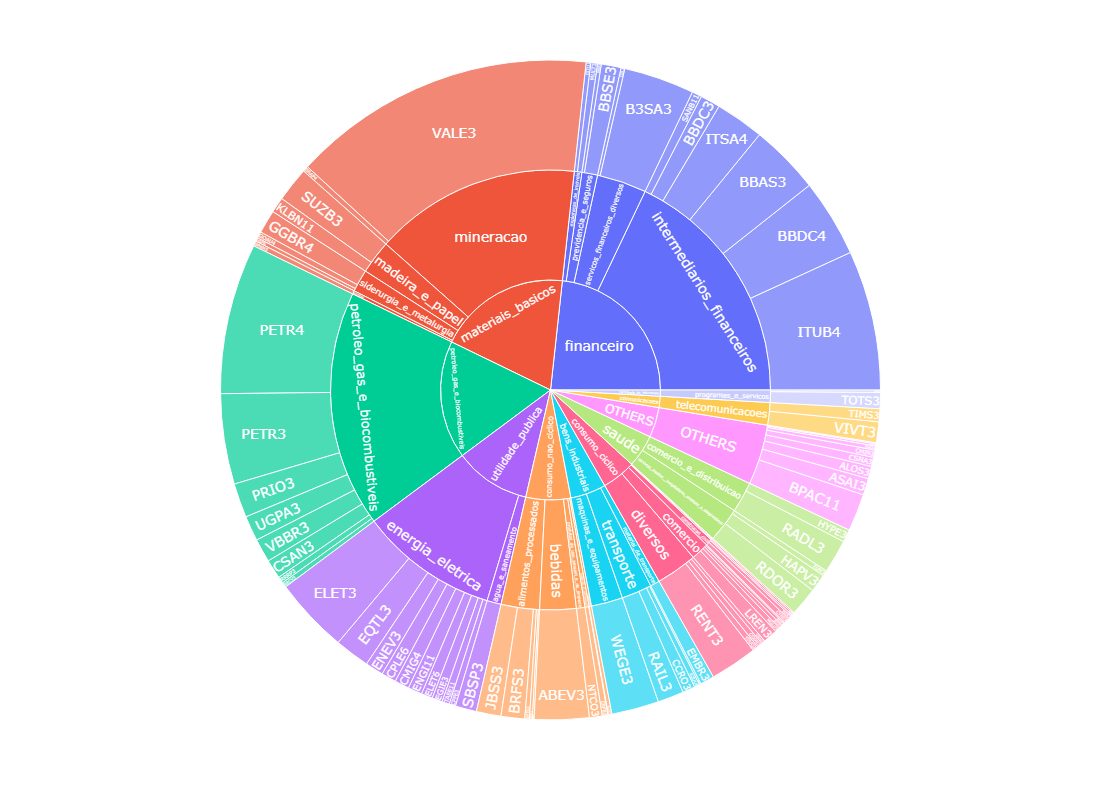

In [10]:
HEIGHT_NUMBER = 800
fig = px.sunburst(df, path=['setor', 'sub_setor', 'ATIVO'], values='PORC_PART', height=HEIGHT_NUMBER)

fig.update_traces(textfont_color='white',
                  textfont_size=14,
                  hovertemplate='<b>%{label}:</b> %{value:.2f}%')
fig.show()

#### Outra maneira de visualizar o gráfico interativo.

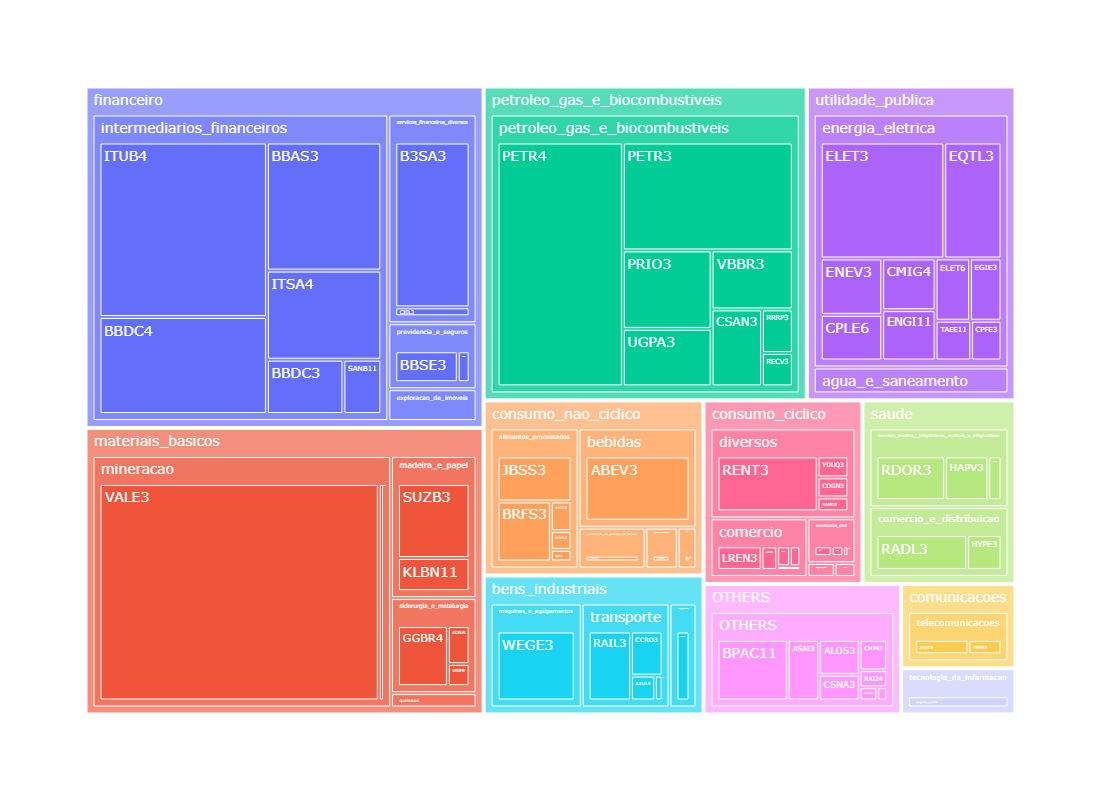

In [11]:
fig = px.treemap(df, path=['setor', 'sub_setor', 'ATIVO'], values='PORC_PART', height=HEIGHT_NUMBER)

fig.update_traces(textfont_color='white',
                  textfont_size=14,
                  hovertemplate='<b>%{label}:</b> %{value:.2f}%')
fig.show()

## Obtendo o valor dos dividendos da carteira teórica

In [12]:
#verificando os ativos por ordem alfabética
df.ATIVO.sort_values()

3     ABEV3
1     ALOS3
2     ALPA4
4     ARZZ3
5     ASAI3
      ...  
82    VAMO3
83    VBBR3
76    VIVT3
84    WEGE3
85    YDUQ3
Name: ATIVO, Length: 86, dtype: object

### Tratando arquivos com ".SA" para padronizar os tickers para obter dados do yahoo finance.

In [13]:
tickers_yf = [x + '.SA' for x in df.ATIVO]
#verificando os 5 primeiros ativos
tickers_yf[0:5]

['RRRP3.SA', 'ALOS3.SA', 'ALPA4.SA', 'ABEV3.SA', 'ARZZ3.SA']

In [14]:
#obtendo a data atual
data_atual = datetime.today()
data_atual = data_atual.strftime('%Y-%m-%d')
data_atual

'2023-11-30'

In [15]:
#definindo a data inicial
data_inicial = '2000-01-01'

In [16]:
#obtendo os dividendos dos ativos através do vectorbt
df_tickers_dividends = vbt.YFData.download(tickers_yf, start=data_inicial, end=data_atual).get('Dividends')

In [17]:
#verificando df
df_tickers_dividends

symbol                     RRRP3.SA  ALOS3.SA  ALPA4.SA  ABEV3.SA  ARZZ3.SA  \
Date                                                                          
2000-01-03 02:00:00+00:00       NaN       NaN       NaN       NaN       NaN   
2000-01-04 02:00:00+00:00       NaN       NaN       NaN       NaN       NaN   
2000-01-05 02:00:00+00:00       NaN       NaN       NaN       0.0       NaN   
2000-01-06 02:00:00+00:00       NaN       NaN       NaN       0.0       NaN   
2000-01-07 02:00:00+00:00       NaN       NaN       NaN       0.0       NaN   
...                             ...       ...       ...       ...       ...   
2023-11-23 03:00:00+00:00       0.0       0.0       0.0       0.0       0.0   
2023-11-24 03:00:00+00:00       0.0       0.0       0.0       0.0       0.0   
2023-11-27 03:00:00+00:00       0.0       0.0       0.0       0.0       0.0   
2023-11-28 03:00:00+00:00       0.0       0.0       0.0       0.0       0.0   
2023-11-29 03:00:00+00:00       0.0       0.0       0.0       0.0       0.0   

symbol                     ASAI3.SA  AZUL4.SA  B3SA3.SA  BBSE3.SA  BBDC3.SA  \
Date                                                                          
2000-01-03 02:00:00+00:00       NaN       NaN       NaN       NaN       0.0   
2000-01-04 02:00:00+00:00       NaN       NaN       NaN       NaN       0.0   
2000-01-05 02:00:00+00:00       NaN       NaN       NaN       NaN       0.0   
2000-01-06 02:00:00+00:00       NaN       NaN       NaN       NaN       0.0   
2000-01-07 02:00:00+00:00       NaN       NaN       NaN       NaN       0.0   
...                             ...       ...       ...       ...       ...   
2023-11-23 03:00:00+00:00       0.0       0.0       0.0       0.0       0.0   
2023-11-24 03:00:00+00:00       0.0       0.0       0.0       0.0       0.0   
2023-11-27 03:00:00+00:00       0.0       0.0       0.0       0.0       0.0   
2023-11-28 03:00:00+00:00       0.0       0.0       0.0       0.0       0.0   
2023-11-29 03:00:00+00:00       0.0       0.0       0.0       0.0       0.0   

symbol                     ...  VIVT3.SA  TIMS3.SA  TOTS3.SA  UGPA3.SA  \
Date                       ...                                           
2000-01-03 02:00:00+00:00  ...       0.0       NaN       NaN       NaN   
2000-01-04 02:00:00+00:00  ...       0.0       NaN       NaN       NaN   
2000-01-05 02:00:00+00:00  ...       0.0       NaN       NaN       NaN   
2000-01-06 02:00:00+00:00  ...       0.0       NaN       NaN       NaN   
2000-01-07 02:00:00+00:00  ...       0.0       NaN       NaN       NaN   
...                        ...       ...       ...       ...       ...   
2023-11-23 03:00:00+00:00  ...       0.0       0.0       0.0       0.0   
2023-11-24 03:00:00+00:00  ...       0.0       0.0       0.0       0.0   
2023-11-27 03:00:00+00:00  ...       0.0       0.0       0.0       0.0   
2023-11-28 03:00:00+00:00  ...       0.0       0.0       0.0       0.0   
2023-11-29 03:00:00+00:00  ...       0.0       0.0       0.0       0.0   

symbol                     USIM5.SA  VALE3.SA  VAMO3.SA  VBBR3.SA  WEGE3.SA  \
Date                                                                          
2000-01-03 02:00:00+00:00       0.0       0.0       NaN       NaN       0.0   
2000-01-04 02:00:00+00:00       0.0       0.0       NaN       NaN       0.0   
2000-01-05 02:00:00+00:00       0.0       0.0       NaN       NaN       0.0   
2000-01-06 02:00:00+00:00       0.0       0.0       NaN       NaN       0.0   
2000-01-07 02:00:00+00:00       0.0       0.0       NaN       NaN       0.0   
...                             ...       ...       ...       ...       ...   
2023-11-23 03:00:00+00:00       0.0       0.0       0.0       0.0       0.0   
2023-11-24 03:00:00+00:00       0.0       0.0       0.0       0.0       0.0   
2023-11-27 03:00:00+00:00       0.0       0.0       0.0       0.0       0.0   
2023-11-28 03:00:00+00:00       0.0       0.0       0.0       0.0       0.0   
2023-11-29 03:00:00+00:00       0

In [18]:
#verificando as últimas linhas do df
df_tickers_dividends.tail()

symbol                     RRRP3.SA  ALOS3.SA  ALPA4.SA  ABEV3.SA  ARZZ3.SA  \
Date                                                                          
2023-11-23 03:00:00+00:00       0.0       0.0       0.0       0.0       0.0   
2023-11-24 03:00:00+00:00       0.0       0.0       0.0       0.0       0.0   
2023-11-27 03:00:00+00:00       0.0       0.0       0.0       0.0       0.0   
2023-11-28 03:00:00+00:00       0.0       0.0       0.0       0.0       0.0   
2023-11-29 03:00:00+00:00       0.0       0.0       0.0       0.0       0.0   

symbol                     ASAI3.SA  AZUL4.SA  B3SA3.SA  BBSE3.SA  BBDC3.SA  \
Date                                                                          
2023-11-23 03:00:00+00:00       0.0       0.0       0.0       0.0       0.0   
2023-11-24 03:00:00+00:00       0.0       0.0       0.0       0.0       0.0   
2023-11-27 03:00:00+00:00       0.0       0.0       0.0       0.0       0.0   
2023-11-28 03:00:00+00:00       0.0       0.0       0.0       0.0       0.0   
2023-11-29 03:00:00+00:00       0.0       0.0       0.0       0.0       0.0   

symbol                     ...  VIVT3.SA  TIMS3.SA  TOTS3.SA  UGPA3.SA  \
Date                       ...                                           
2023-11-23 03:00:00+00:00  ...       0.0       0.0       0.0       0.0   
2023-11-24 03:00:00+00:00  ...       0.0       0.0       0.0       0.0   
2023-11-27 03:00:00+00:00  ...       0.0       0.0       0.0       0.0   
2023-11-28 03:00:00+00:00  ...       0.0       0.0       0.0       0.0   
2023-11-29 03:00:00+00:00  ...       0.0       0.0       0.0       0.0   

symbol                     USIM5.SA  VALE3.SA  VAMO3.SA  VBBR3.SA  WEGE3.SA  \
Date                                                                          
2023-11-23 03:00:00+00:00       0.0       0.0       0.0       0.0       0.0   
2023-11-24 03:00:00+00:00       0.0       0.0       0.0       0.0       0.0   
2023-11-27 03:00:00+00:00       0.0       0.0       0.0       0.0       0.0   
2023-11-28 03:00:00+00:00       0.0       0.0       0.0       0.0       0.0   
2023-11-29 03:00:00+00:00       0.0       0.0       0.0       0.0       0.0   

symbol                     YDUQ3.SA  
Date                                 
2023-11-23 03:00:00+00:00       0.0  
2023-11-24 03:00:00+00:00       0.0  
2023-11-27 03:00:00+00:00       0.0  
2023-11-28 03:00:00+00:00       0.0  
2023-11-29 03:00:00+00:00       0.0  

[5 rows x 86 columns]

In [19]:
#verificando o total de dividendos pagos no periodo por ordem decrescente
df_total_dividends = df_tickers_dividends.sum()
df_total_dividends.sort_values(ascending=False)

symbol
CPLE6.SA    168.677271
VIVT3.SA     48.899306
VALE3.SA     45.119186
PETR4.SA     38.664669
PETR3.SA     35.097291
               ...    
LWSA3.SA      0.084198
PRIO3.SA      0.000000
ALOS3.SA      0.000000
AZUL4.SA      0.000000
RRRP3.SA      0.000000
Length: 86, dtype: float64

In [20]:
#inserindo a coluna ano no df
df_tickers_dividends['year'] = df_tickers_dividends.index.strftime('%Y')

In [21]:
df_pivot_dividends = aux.pfun_pivot_por_ano(df_tickers_dividends, df_tickers_dividends)
df_pivot_dividends.iloc[:, 0:5]

symbol  ABEV3.SA  ALOS3.SA  ALPA4.SA  ARZZ3.SA  ASAI3.SA
year                                                    
2000    0.000000       0.0  0.000000  0.000000  0.000000
2001    0.000000       0.0  0.000000  0.000000  0.000000
2002    0.000000       0.0  0.000000  0.000000  0.000000
2003    0.000000       0.0  0.000000  0.000000  0.000000
2004    0.000000       0.0  0.000000  0.000000  0.000000
2005    0.000000       0.0  0.000000  0.000000  0.000000
2006    0.000000       0.0  0.000000  0.000000  0.000000
2007    0.016302       0.0  0.000000  0.000000  0.000000
2008    0.097491       0.0  0.000000  0.000000  0.000000
2009    0.163877       0.0  0.009009  0.000000  0.000000
2010    0.117310       0.0  0.061423  0.000000  0.000000
2011    0.217601       0.0  0.476419  0.095339  0.000000
2012    0.476664       0.0  0.153830  0.365819  0.000000
2013    0.257176       0.0  0.154010  0.715999  0.000000
2014    0.593980       0.0  0.152876  0.498510  0.000000
2015    1.580000       0.0  0.730639  0.773391  0.000000
2016    0.640000       0.0  0.240310  0.834551  0.000000
2017    0.540000       0.0  0.272388  1.648690  0.000000
2018    0.550000       0.0  0.377027  1.284822  0.000000
2019    0.490600       0.0  0.000000  1.410794  0.000000
2020    0.413700       0.0  0.055166  0.530726  0.000000
2021    0.680300       0.0  0.271712  0.927038  0.110341
2022    0.762300       0.0  0.163028  1.835629  0.162098
2023    0.000000       0.0  0.000000  1.932467  0.050019

### Plotando gráfico da soma dos dividendos dos 10 primeiros ativos por ano

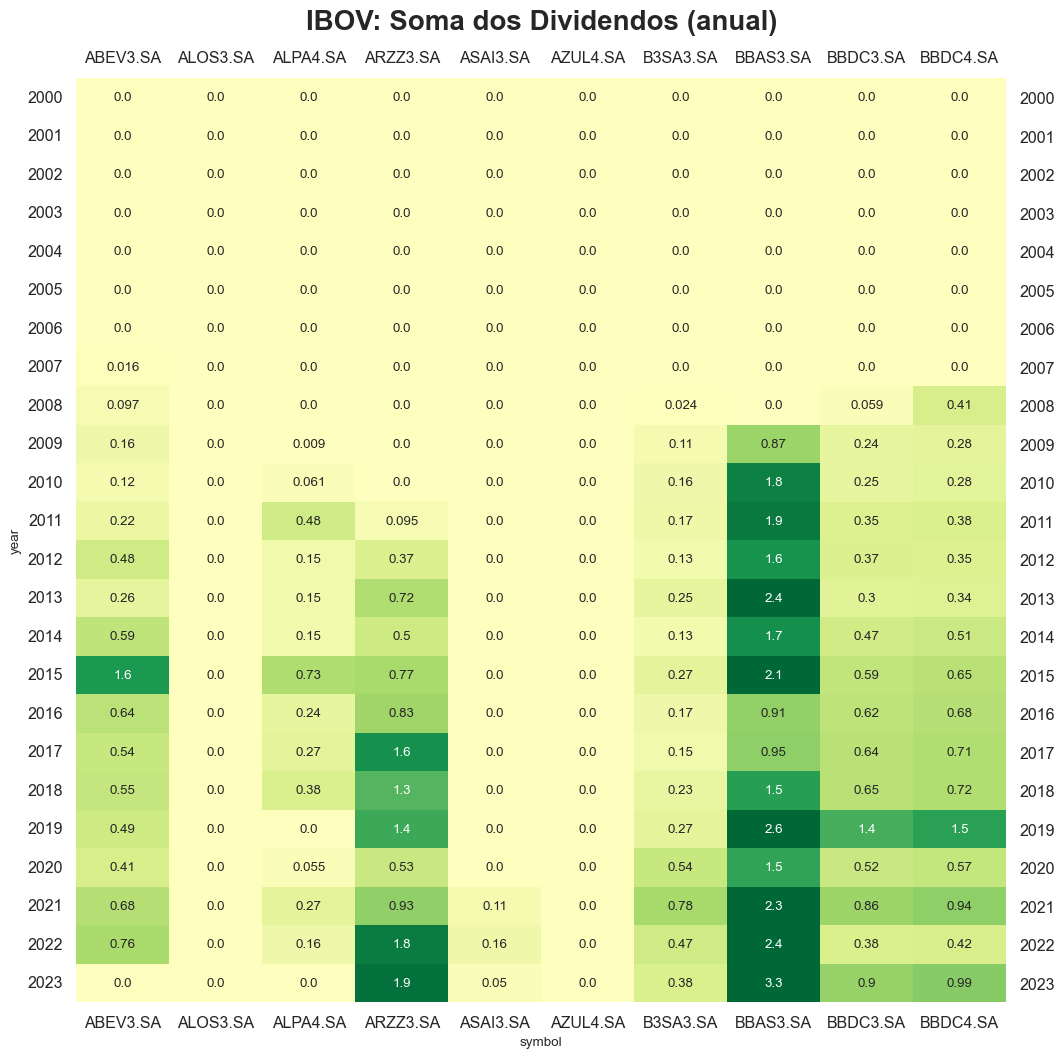

In [22]:
NUMBER_BASE = 0

#visualizando grafico
plt.figure(figsize=(12,12))
sns.set(font_scale=0.8)

aux.pfun_gerar_grafico_retorno_pivot(df_pivot_dividends.iloc[:, 0:10], 'all', carteira_teorica.upper(), 'anual', '.2', NUMBER_BASE)

In [23]:
#obtendo os precos de fechamento dos ativos atraves do vectorbt
df_tickers_close = vbt.YFData.download(tickers_yf, start=data_inicial, end=data_atual).get('Close')

In [24]:
#verificando df
df_tickers_close

symbol                      RRRP3.SA   ALOS3.SA  ALPA4.SA   ABEV3.SA  \
Date                                                                   
2000-01-03 02:00:00+00:00        NaN        NaN       NaN        NaN   
2000-01-04 02:00:00+00:00        NaN        NaN       NaN        NaN   
2000-01-05 02:00:00+00:00        NaN        NaN       NaN   0.305528   
2000-01-06 02:00:00+00:00        NaN        NaN       NaN   0.290040   
2000-01-07 02:00:00+00:00        NaN        NaN       NaN   0.290040   
...                              ...        ...       ...        ...   
2023-11-23 03:00:00+00:00  32.380001  25.170000      9.15  13.550000   
2023-11-24 03:00:00+00:00  32.099998  24.860001      8.94  13.390000   
2023-11-27 03:00:00+00:00  30.730000  25.150000      9.12  13.580000   
2023-11-28 03:00:00+00:00  30.340000  25.240000      9.37  13.650000   
2023-11-29 03:00:00+00:00  30.000000  24.950001      9.20  13.300000   

symbol                      ARZZ3.SA  ASAI3.SA   AZUL4.SA  B3SA3.SA  \
Date                                                                  
2000-01-03 02:00:00+00:00        NaN       NaN        NaN       NaN   
2000-01-04 02:00:00+00:00        NaN       NaN        NaN       NaN   
2000-01-05 02:00:00+00:00        NaN       NaN        NaN       NaN   
2000-01-06 02:00:00+00:00        NaN       NaN        NaN       NaN   
2000-01-07 02:00:00+00:00        NaN       NaN        NaN       NaN   
...                              ...       ...        ...       ...   
2023-11-23 03:00:00+00:00  60.639999     13.60  17.209999     13.17   
2023-11-24 03:00:00+00:00  59.419998     13.15  17.500000     12.92   
2023-11-27 03:00:00+00:00  60.139999     13.49  17.629999     12.92   
2023-11-28 03:00:00+00:00  60.799999     13.52  17.799999     13.22   
2023-11-29 03:00:00+00:00  59.919998     13.17  17.440001     13.25   

symbol                      BBSE3.SA   BBDC3.SA  ...   VIVT3.SA   TIMS3.SA  \
Date                                             ...                         
2000-01-03 02:00:00+00:00        NaN   1.114720  ...   7.293935        NaN   
2000-01-04 02:00:00+00:00        NaN   1.033649  ...   7.096393        NaN   
2000-01-05 02:00:00+00:00        NaN   1.068779  ...   7.175410        NaN   
2000-01-06 02:00:00+00:00        NaN   1.084994  ...   7.333444        NaN   
2000-01-07 02:00:00+00:00        NaN   1.103909  ...   7.369915        NaN   
...                              ...        ...  ...        ...        ...   
2023-11-23 03:00:00+00:00  32.099998  14.200000  ...  52.410000  16.730000   
2023-11-24 03:00:00+00:00  31.910000  14.290000  ...  52.189999  16.980000   
2023-11-27 03:00:00+00:00  31.709999  14.160000  ...  52.369999  16.820000   
2023-11-28 03:00:00+00:00  31.809999  14.230000  ...  52.070000  17.049999   
2023-11-29 03:00:00+00:00  31.450001  14.150000  ...  52.619999  17.049999   

symbol                      TOTS3.SA   UGPA3.SA  USIM5.SA   VALE3.SA  \
Date                                                                   
2000-01-03 02:00:00+00:00        NaN        NaN  1.509654   1.600482   
2000-01-04 02:00:00+00:00        NaN        NaN  1.454614   1.562375   
2000-01-05 02:00:00+00:00        NaN        NaN  1.592999   1.562375   
2000-01-06 02:00:00+00:00        NaN        NaN  1.737674   1.562375   
2000-01-07 02:00:00+00:00        NaN        NaN  1.806867   1.619535   
...                              ...        ...       ...        ...   
2023-11-23 03:00:00+00:00  33.000000  24.450001  7.760000  74.379997   
2023-11-24 03:00:00+00:00  32.330002  24.340000  7.700000  73.750000   
2023-11-27 03:00:00+00:00  33.090000  24.450001  7.810000  73.309998   
2023-11-28 03:00:00+00:00  33.560001  24.950001  7.870000  73.470001   
2023-11-29 03:00:00+00:00  33.480000  24.719999  7.750000  73.449997   

symbol                     VAMO3.SA   VBBR3.SA   WEGE3.SA   YDUQ3.SA  
Date                                                                  
2000-01-03 02:00:00+00:00       NaN        Na

In [25]:
#criando a coluna year para armazenar o ano
df_tickers_close['year'] = df_tickers_close.index.strftime('%Y')
df_tickers_close

symbol                      RRRP3.SA   ALOS3.SA  ALPA4.SA   ABEV3.SA  \
Date                                                                   
2000-01-03 02:00:00+00:00        NaN        NaN       NaN        NaN   
2000-01-04 02:00:00+00:00        NaN        NaN       NaN        NaN   
2000-01-05 02:00:00+00:00        NaN        NaN       NaN   0.305528   
2000-01-06 02:00:00+00:00        NaN        NaN       NaN   0.290040   
2000-01-07 02:00:00+00:00        NaN        NaN       NaN   0.290040   
...                              ...        ...       ...        ...   
2023-11-23 03:00:00+00:00  32.380001  25.170000      9.15  13.550000   
2023-11-24 03:00:00+00:00  32.099998  24.860001      8.94  13.390000   
2023-11-27 03:00:00+00:00  30.730000  25.150000      9.12  13.580000   
2023-11-28 03:00:00+00:00  30.340000  25.240000      9.37  13.650000   
2023-11-29 03:00:00+00:00  30.000000  24.950001      9.20  13.300000   

symbol                      ARZZ3.SA  ASAI3.SA   AZUL4.SA  B3SA3.SA  \
Date                                                                  
2000-01-03 02:00:00+00:00        NaN       NaN        NaN       NaN   
2000-01-04 02:00:00+00:00        NaN       NaN        NaN       NaN   
2000-01-05 02:00:00+00:00        NaN       NaN        NaN       NaN   
2000-01-06 02:00:00+00:00        NaN       NaN        NaN       NaN   
2000-01-07 02:00:00+00:00        NaN       NaN        NaN       NaN   
...                              ...       ...        ...       ...   
2023-11-23 03:00:00+00:00  60.639999     13.60  17.209999     13.17   
2023-11-24 03:00:00+00:00  59.419998     13.15  17.500000     12.92   
2023-11-27 03:00:00+00:00  60.139999     13.49  17.629999     12.92   
2023-11-28 03:00:00+00:00  60.799999     13.52  17.799999     13.22   
2023-11-29 03:00:00+00:00  59.919998     13.17  17.440001     13.25   

symbol                      BBSE3.SA   BBDC3.SA  ...   TIMS3.SA   TOTS3.SA  \
Date                                             ...                         
2000-01-03 02:00:00+00:00        NaN   1.114720  ...        NaN        NaN   
2000-01-04 02:00:00+00:00        NaN   1.033649  ...        NaN        NaN   
2000-01-05 02:00:00+00:00        NaN   1.068779  ...        NaN        NaN   
2000-01-06 02:00:00+00:00        NaN   1.084994  ...        NaN        NaN   
2000-01-07 02:00:00+00:00        NaN   1.103909  ...        NaN        NaN   
...                              ...        ...  ...        ...        ...   
2023-11-23 03:00:00+00:00  32.099998  14.200000  ...  16.730000  33.000000   
2023-11-24 03:00:00+00:00  31.910000  14.290000  ...  16.980000  32.330002   
2023-11-27 03:00:00+00:00  31.709999  14.160000  ...  16.820000  33.090000   
2023-11-28 03:00:00+00:00  31.809999  14.230000  ...  17.049999  33.560001   
2023-11-29 03:00:00+00:00  31.450001  14.150000  ...  17.049999  33.480000   

symbol                      UGPA3.SA  USIM5.SA   VALE3.SA  VAMO3.SA  \
Date                                                                  
2000-01-03 02:00:00+00:00        NaN  1.509654   1.600482       NaN   
2000-01-04 02:00:00+00:00        NaN  1.454614   1.562375       NaN   
2000-01-05 02:00:00+00:00        NaN  1.592999   1.562375       NaN   
2000-01-06 02:00:00+00:00        NaN  1.737674   1.562375       NaN   
2000-01-07 02:00:00+00:00        NaN  1.806867   1.619535       NaN   
...                              ...       ...        ...       ...   
2023-11-23 03:00:00+00:00  24.450001  7.760000  74.379997      9.65   
2023-11-24 03:00:00+00:00  24.340000  7.700000  73.750000      9.46   
2023-11-27 03:00:00+00:00  24.450001  7.810000  73.309998      9.15   
2023-11-28 03:00:00+00:00  24.950001  7.870000  73.470001      9.11   
2023-11-29 03:00:00+00:00  24.719999  7.750000  73.449997      9.33   

symbol                      VBBR3.SA   WEGE3.SA   YDUQ3.SA  year  
Date                                                              
2000-01-03 02:00:00+00:00        NaN   0.122103        NaN  2000  

In [26]:
df_pivot_close = aux.pfun_pivot_por_ano(df_tickers_close, df_tickers_close, tipo_agg='last')
df_pivot_close

symbol   ABEV3.SA   ALOS3.SA   ALPA4.SA   ARZZ3.SA   ASAI3.SA   AZUL4.SA  \
year                                                                       
2000     0.908822        NaN        NaN        NaN        NaN        NaN   
2001     0.827608        NaN        NaN        NaN        NaN        NaN   
2002     0.924293        NaN        NaN        NaN        NaN        NaN   
2003     1.227876        NaN        NaN        NaN        NaN        NaN   
2004     2.645255        NaN        NaN        NaN        NaN        NaN   
2005     1.762389        NaN        NaN        NaN        NaN        NaN   
2006     2.210018        NaN        NaN        NaN        NaN        NaN   
2007     2.938698        NaN        NaN        NaN        NaN        NaN   
2008     2.048962        NaN   0.960113        NaN        NaN        NaN   
2009     3.753812        NaN   2.437345        NaN        NaN        NaN   
2010     5.527489        NaN   4.641344        NaN        NaN        NaN   
2011     7.144755        NaN   5.738705  17.391527        NaN        NaN   
2012    11.353683        NaN   7.816877  30.031708        NaN        NaN   
2013    11.927720        NaN   8.560423  23.025564        NaN        NaN   
2014    11.638450        NaN   4.698034  21.274752        NaN        NaN   
2015    14.011286        NaN   5.152455  17.132710        NaN        NaN   
2016    13.342364        NaN   7.476499  21.134130        NaN        NaN   
2017    17.800434        NaN  13.358040  48.126541        NaN  26.900000   
2018    13.285298        NaN  13.445302  49.795704        NaN  36.000000   
2019    16.550781        NaN  32.783783  59.438297        NaN  58.279999   
2020    14.240406        NaN  41.537453  63.865917        NaN  39.299999   
2021    14.648190        NaN  36.856972  72.758255  12.778955  24.360001   
2022    14.520000        NaN  15.080000  75.989250  19.390823  11.010000   
2023    13.300000  24.950001   9.200000  59.919998  13.170000  17.440001   

symbol   B3SA3.SA   BBAS3.SA   BBDC3.SA   BBDC4.SA  ...   TIMS3.SA   TOTS3.SA  \
year                                                ...                         
2000          NaN   0.787285   1.186331        NaN  ...        NaN        NaN   
2001          NaN   1.396542   1.064726        NaN  ...        NaN        NaN   
2002          NaN   1.292360   1.033649        NaN  ...        NaN        NaN   
2003          NaN   3.164965   1.363335        NaN  ...        NaN        NaN   
2004          NaN   4.285892   1.540339        NaN  ...        NaN        NaN   
2005          NaN   5.565062   3.485490        NaN  ...   4.181729        NaN   
2006          NaN   8.439908   4.483199        NaN  ...   8.588943   2.345293   
2007    20.544939  12.026865   5.566840        NaN  ...   5.944616   2.926038   
2008     3.613689   5.807709   3.263802   7.943624  ...   3.354949   1.905610   
2009     7.441319  11.839395   4.975135   7.406378  ...   4.885517   6.095581   
2010     8.078563  13.660451   5.396715   6.839574  ...   4.755739   9.040888   
2011     2.085119  11.055585   5.520875   6.670762  ...   6.610582   9.060462   
2012     3.089879  12.791037   7.674798   7.857810  ...   5.915460  11.208157   
2013     2.588244  13.481602   8.142616   7.361446  ...   9.062257  10.441747   
2014     2.387372  14.045374   9.066813   9.229504  ...   8.816877  10.173929   
2015     2.827162   9.622245   6.878638   6.471591  ...   5.281084   9.340276   
2016     4.418051  19.187809  11.244191  11.241211  ...   6.187786   7.482060   
2017     6.227531  22.420675  14.123532  15.002220  ...  10.485970   9.411077   
2018     7.554281  34.170845  16.973293  19.485909  ...   9.648530   8.615592   
2019    12.360664  40.884239  21.674606  23.162762  ...  13.269694  20.724846   
2020    18.423000  31.242754  17.397110  19.638399  ...  12.902336  27.896551   
2021    10.416429  25.027634  13.427633  15.989046  ...  11.986300  28.096355   
2022    12.811978  32.255173  12.592008  14.183078  ...  11.843450  27.194248  

In [27]:
#criando um df do dividend yield
df_dy = (df_pivot_dividends / df_pivot_close)
df_dy

symbol  ABEV3.SA  ALOS3.SA  ALPA4.SA  ARZZ3.SA  ASAI3.SA  AZUL4.SA  B3SA3.SA  \
year                                                                           
2000    0.000000       NaN       NaN       NaN       NaN       NaN       NaN   
2001    0.000000       NaN       NaN       NaN       NaN       NaN       NaN   
2002    0.000000       NaN       NaN       NaN       NaN       NaN       NaN   
2003    0.000000       NaN       NaN       NaN       NaN       NaN       NaN   
2004    0.000000       NaN       NaN       NaN       NaN       NaN       NaN   
2005    0.000000       NaN       NaN       NaN       NaN       NaN       NaN   
2006    0.000000       NaN       NaN       NaN       NaN       NaN       NaN   
2007    0.005547       NaN       NaN       NaN       NaN       NaN  0.000000   
2008    0.047581       NaN  0.000000       NaN       NaN       NaN  0.006733   
2009    0.043656       NaN  0.003696       NaN       NaN       NaN  0.014814   
2010    0.021223       NaN  0.013234       NaN       NaN       NaN  0.019416   
2011    0.030456       NaN  0.083019  0.005482       NaN       NaN  0.083507   
2012    0.041983       NaN  0.019679  0.012181       NaN       NaN  0.043644   
2013    0.021561       NaN  0.017991  0.031096       NaN       NaN  0.096136   
2014    0.051036       NaN  0.032540  0.023432       NaN       NaN  0.056437   
2015    0.112766       NaN  0.141804  0.045141       NaN       NaN  0.094216   
2016    0.047968       NaN  0.032142  0.039488       NaN       NaN  0.037993   
2017    0.030336       NaN  0.020391  0.034257       NaN       0.0  0.024233   
2018    0.041399       NaN  0.028042  0.025802       NaN       0.0  0.030982   
2019    0.029642       NaN  0.000000  0.023735       NaN       0.0  0.021688   
2020    0.029051       NaN  0.001328  0.008310       NaN       0.0  0.029227   
2021    0.046443       NaN  0.007372  0.012741  0.008635       0.0  0.075199   
2022    0.052500       NaN  0.010811  0.024156  0.008360       0.0  0.036615   
2023    0.000000       0.0  0.000000  0.032251  0.003798       0.0  0.028830   

symbol  BBAS3.SA  BBDC3.SA  BBDC4.SA  ...  TIMS3.SA  TOTS3.SA  UGPA3.SA  \
year                                  ...                                 
2000    0.000000  0.000000       NaN  ...       NaN       NaN       NaN   
2001    0.000000  0.000000       NaN  ...       NaN       NaN       NaN   
2002    0.000000  0.000000       NaN  ...       NaN       NaN  0.000000   
2003    0.000000  0.000000       NaN  ...       NaN       NaN  0.000000   
2004    0.000000  0.000000       NaN  ...       NaN       NaN  0.000000   
2005    0.000000  0.000000       NaN  ...  0.000000       NaN  0.000000   
2006    0.000000  0.000000       NaN  ...  0.000000  0.000000  0.000000   
2007    0.000000  0.000000       NaN  ...  0.000000  0.000000  0.000000   
2008    0.000000  0.018150  0.052058  ...  0.000000  0.060411  0.026888   
2009    0.073351  0.047641  0.037655  ...  0.000000  0.013636  0.017650   
2010    0.130799  0.045882  0.041229  ...  0.026296  0.017045  0.028485   
2011    0.167992  0.062642  0.057319  ...  0.030344  0.022037  0.016273   
2012    0.127106  0.047819  0.044931  ...  0.016024  0.019343  0.012072   
2013    0.176313  0.036584  0.045757  ...  0.016962  0.023092  0.012776   
2014    0.118190  0.051532  0.055100  ...  0.040089  0.031453  0.014832   
2015    0.214257  0.085768  0.100772  ...  0.028735  0.040454  0.013215   
2016    0.047619  0.055272  0.060815  ...  0.031291  0.040944  0.012235   
2017    0.042192  0.045446  0.047062  ...  0.013347  0.012458  0.011865   
2018    0.044373  0.038310  0.036707  ...  0.024553  0.008987  0.014035   
2019    0.062475  0.063189  0.065042  ...  0.035109  0.008020  0.010914   
2020    0.047272  0.029983  0.029217  ...  0.042610  0.007630  0.005082   
2021    0.090550  0.063911  0.059039  ...  0.036110  0.011018  0.029514   
2022    0.075494  0.030133  0.029428  ...  0.048841  0.003677  0.047198   
2023    0.062148  0.063542  0.061316  ...  0

### Plotando gráfico do dividend yield dos 10 primeiros ativos por ano

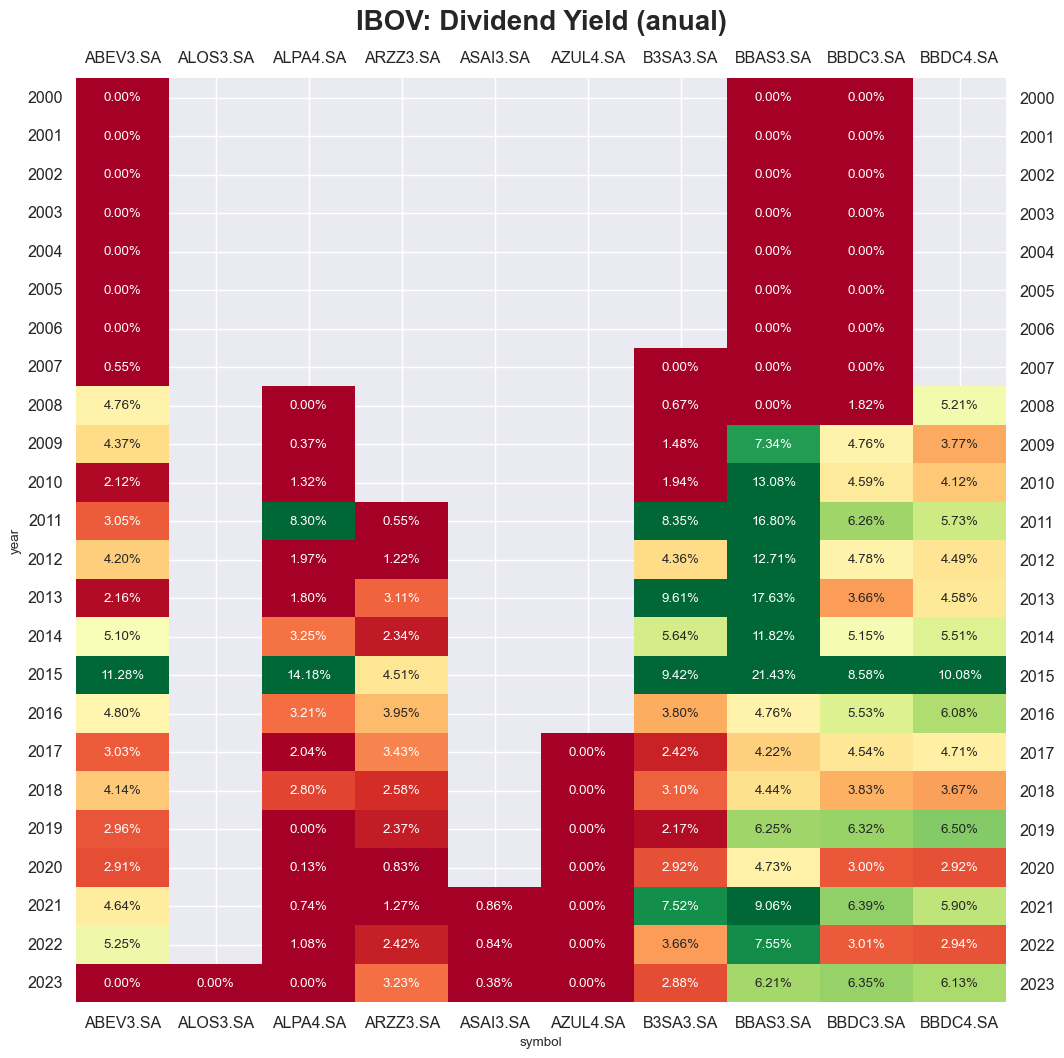

In [37]:
NUMBER_BASE = 5/100

#visualizando grafico
plt.figure(figsize=(12,12))
sns.set(font_scale=0.8)

aux.pfun_gerar_grafico_retorno_pivot(df_dy.iloc[:, 0:10], 'all_dy', carteira_teorica.upper(), 'anual', '.2%', NUMBER_BASE)

### Definindo um ano referência para estudo

In [29]:
ANO_REF = '2022'

#classificando por ano
df_dy_order = df_dy.transpose().sort_values(ANO_REF, ascending=False)
df_dy_order

year      2000  2001  2002  2003  2004      2005      2006      2007  \
symbol                                                                 
PETR4.SA   0.0   0.0   0.0   0.0   0.0  0.081172  0.134969  0.074623   
PETR3.SA   0.0   0.0   0.0   0.0   0.0  0.000000  0.000000  0.000000   
MRFG3.SA   NaN   NaN   NaN   NaN   NaN       NaN       NaN  0.000000   
CMIN3.SA   NaN   NaN   NaN   NaN   NaN       NaN       NaN       NaN   
CSNA3.SA   0.0   0.0   0.0   0.0   0.0  0.000000  0.000000  0.000000   
...        ...   ...   ...   ...   ...       ...       ...       ...   
GOLL4.SA   NaN   NaN   NaN   NaN   0.0  0.005232  0.021160  0.020197   
HAPV3.SA   NaN   NaN   NaN   NaN   NaN       NaN       NaN       NaN   
IRBR3.SA   NaN   NaN   NaN   NaN   NaN       NaN       NaN       NaN   
RRRP3.SA   NaN   NaN   NaN   NaN   NaN       NaN       NaN       NaN   
ALOS3.SA   NaN   NaN   NaN   NaN   NaN       NaN       NaN       NaN   

year          2008      2009  ...      2014      2015  2016      2017  \
symbol                        ...                                       
PETR4.SA  0.047387  0.099905  ...  0.282412  0.000000   0.0  0.000000   
PETR3.SA  0.004844  0.076976  ...  0.150658  0.000000   0.0  0.000000   
MRFG3.SA  0.000000  0.030106  ...  0.000000  0.000000   0.0  0.000000   
CMIN3.SA       NaN       NaN  ...       NaN       NaN   NaN       NaN   
CSNA3.SA  0.149776  0.088124  ...  0.089761  0.163247   0.0  0.000000   
...            ...       ...  ...       ...       ...   ...       ...   
GOLL4.SA  0.018918  0.000000  ...  0.000000  0.000000   0.0  0.000000   
HAPV3.SA       NaN       NaN  ...       NaN       NaN   NaN       NaN   
IRBR3.SA       NaN       NaN  ...       NaN       NaN   NaN  0.017439   
RRRP3.SA       NaN       NaN  ...       NaN       NaN   NaN       NaN   
ALOS3.SA       NaN       NaN  ...       NaN       NaN   NaN       NaN   

year          2018      2019      2020      2021      2022      2023  
symbol                                                                
PETR4.SA  0.113454  0.084841  0.000130  0.438804  0.883179  0.206038  
PETR3.SA  0.026296  0.040934  0.061716  0.378401  0.753296  0.194343  
MRFG3.SA  0.000000  0.000000  0.000000  0.158293  0.258345  0.000000  
CMIN3.SA       NaN       NaN       NaN  0.098142  0.257891  0.099651  
CSNA3.SA  0.109594  0.152116  0.000373  0.098830  0.194472  0.084337  
...            ...       ...       ...       ...       ...       ...  
GOLL4.SA  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
HAPV3.SA  0.006014  0.004376  0.004282  0.006019  0.000000  0.000000  
IRBR3.SA  0.007108  0.007408  0.001529  0.000000  0.000000  0.000000  
RRRP3.SA       NaN       NaN  0.000000  0.000000  0.000000  0.000000  
ALOS3.SA       NaN       NaN       NaN       NaN       NaN  0.000000  

[86 rows x 24 columns]

In [30]:
#selecionando apenas um ano
df_dy_ano_ref = df_dy.transpose().sort_values(ANO_REF,ascending=False)[[ANO_REF]]
df_dy_ano_ref*100

year           2022
symbol             
PETR4.SA  88.317892
PETR3.SA  75.329600
MRFG3.SA  25.834518
CMIN3.SA  25.789065
CSNA3.SA  19.447159
...             ...
GOLL4.SA   0.000000
HAPV3.SA   0.000000
IRBR3.SA   0.000000
RRRP3.SA   0.000000
ALOS3.SA        NaN

[86 rows x 1 columns]

In [31]:
#verificando uma media entre os anos
df_media_anual_dy = df_dy.mean().sort_values(ascending=False)
df_media_anual_dy*100

symbol
CPLE6.SA     1636.860684
TAEE11.SA      17.645189
GOAU4.SA       17.165277
CMIN3.SA       15.189448
ELET6.SA       12.655103
                ...     
RAIL3.SA        0.043598
AZUL4.SA        0.000000
RRRP3.SA        0.000000
ALOS3.SA        0.000000
PRIO3.SA        0.000000
Length: 86, dtype: float64

In [32]:
#obtendo o dividendo acumulado no periodo
df_soma_acum = (1 + df_dy).cumprod()
df_soma_acum

symbol  ABEV3.SA  ALOS3.SA  ALPA4.SA  ARZZ3.SA  ASAI3.SA  AZUL4.SA  B3SA3.SA  \
year                                                                           
2000    1.000000       NaN       NaN       NaN       NaN       NaN       NaN   
2001    1.000000       NaN       NaN       NaN       NaN       NaN       NaN   
2002    1.000000       NaN       NaN       NaN       NaN       NaN       NaN   
2003    1.000000       NaN       NaN       NaN       NaN       NaN       NaN   
2004    1.000000       NaN       NaN       NaN       NaN       NaN       NaN   
2005    1.000000       NaN       NaN       NaN       NaN       NaN       NaN   
2006    1.000000       NaN       NaN       NaN       NaN       NaN       NaN   
2007    1.005547       NaN       NaN       NaN       NaN       NaN  1.000000   
2008    1.053392       NaN  1.000000       NaN       NaN       NaN  1.006733   
2009    1.099379       NaN  1.003696       NaN       NaN       NaN  1.021647   
2010    1.122711       NaN  1.016979       NaN       NaN       NaN  1.041484   
2011    1.156905       NaN  1.101407  1.005482       NaN       NaN  1.128455   
2012    1.205475       NaN  1.123082  1.017730       NaN       NaN  1.177705   
2013    1.231467       NaN  1.143287  1.049377       NaN       NaN  1.290926   
2014    1.294316       NaN  1.180490  1.073966       NaN       NaN  1.363781   
2015    1.440271       NaN  1.347889  1.122446       NaN       NaN  1.492271   
2016    1.509357       NaN  1.391213  1.166770       NaN       NaN  1.548968   
2017    1.555145       NaN  1.419581  1.206740       NaN       1.0  1.586504   
2018    1.619527       NaN  1.459388  1.237876       NaN       1.0  1.635656   
2019    1.667533       NaN  1.459388  1.267258       NaN       1.0  1.671130   
2020    1.715977       NaN  1.461327  1.277789       NaN       1.0  1.719971   
2021    1.795671       NaN  1.472100  1.294069  1.008635       1.0  1.849312   
2022    1.889944       NaN  1.488014  1.325329  1.017066       1.0  1.917023   
2023    1.889944       1.0  1.488014  1.368072  1.020929       1.0  1.972292   

symbol  BBAS3.SA  BBDC3.SA  BBDC4.SA  ...  TIMS3.SA  TOTS3.SA  UGPA3.SA  \
year                                  ...                                 
2000    1.000000  1.000000       NaN  ...       NaN       NaN       NaN   
2001    1.000000  1.000000       NaN  ...       NaN       NaN       NaN   
2002    1.000000  1.000000       NaN  ...       NaN       NaN  1.000000   
2003    1.000000  1.000000       NaN  ...       NaN       NaN  1.000000   
2004    1.000000  1.000000       NaN  ...       NaN       NaN  1.000000   
2005    1.000000  1.000000       NaN  ...  1.000000       NaN  1.000000   
2006    1.000000  1.000000       NaN  ...  1.000000  1.000000  1.000000   
2007    1.000000  1.000000       NaN  ...  1.000000  1.000000  1.000000   
2008    1.000000  1.018150  1.052058  ...  1.000000  1.060411  1.026888   
2009    1.073351  1.066656  1.091673  ...  1.000000  1.074871  1.045012   
2010    1.213744  1.115596  1.136681  ...  1.026296  1.093193  1.074780   
2011    1.417644  1.185478  1.201834  ...  1.057438  1.117283  1.092269   
2012    1.597835  1.242166  1.255834  ...  1.074382  1.138895  1.105455   
2013    1.879555  1.287609  1.313296  ...  1.092605  1.165194  1.119578   
2014    2.101699  1.353963  1.385659  ...  1.136407  1.201844  1.136184   
2015    2.552003  1.470090  1.525294  ...  1.169061  1.250463  1.151198   
2016    2.673528  1.551345  1.618055  ...  1.205643  1.301662  1.165284   
2017    2.786328  1.621847  1.694204  ...  1.221735  1.317877  1.179110   
2018    2.909965  1.683980  1.756394  ...  1.251731  1.329721  1.195659   
2019    3.091765  1.790388  1.870633  ...  1.295679  1.340385  1.208708   
2020    3.237919  1.844069  1.925288  ...  1.350887  1.350613  1.214851   
2021    3.531113  1.961925  2.038956  ...  1.399668  1.365494  1.250706   
2022    3.797691  2.021044  2.098959  ...  1.468029  1.370515  1.309736   
2023    4.033708  2.149465  2.227659  ...  1

In [33]:
#obtendo o maior pagador de dividendo no periodo
df_soma_acum.iloc[-1].sort_values(ascending=False)

symbol
CPLE6.SA     1931.520631
GOAU4.SA       31.286080
TAEE11.SA      15.147640
PETR4.SA       11.175204
CMIG4.SA        8.222069
                ...     
RAIL3.SA        1.003927
RRRP3.SA        1.000000
PRIO3.SA        1.000000
AZUL4.SA        1.000000
ALOS3.SA        1.000000
Name: 2023, Length: 86, dtype: float64

In [34]:
#verificando a soma dos dividendos dos ultimos 12 meses
df_dividends_rolling = df_tickers_dividends.rolling('365D').sum()
df_dividends_rolling

symbol                     RRRP3.SA  ALOS3.SA  ALPA4.SA  ABEV3.SA  ARZZ3.SA  \
Date                                                                          
2000-01-03 02:00:00+00:00       NaN       NaN       NaN       NaN       NaN   
2000-01-04 02:00:00+00:00       NaN       NaN       NaN       NaN       NaN   
2000-01-05 02:00:00+00:00       NaN       NaN       NaN    0.0000       NaN   
2000-01-06 02:00:00+00:00       NaN       NaN       NaN    0.0000       NaN   
2000-01-07 02:00:00+00:00       NaN       NaN       NaN    0.0000       NaN   
...                             ...       ...       ...       ...       ...   
2023-11-23 03:00:00+00:00       0.0       0.0       0.0    0.7623  2.677642   
2023-11-24 03:00:00+00:00       0.0       0.0       0.0    0.7623  2.677642   
2023-11-27 03:00:00+00:00       0.0       0.0       0.0    0.7623  2.677642   
2023-11-28 03:00:00+00:00       0.0       0.0       0.0    0.7623  2.677642   
2023-11-29 03:00:00+00:00       0.0       0.0       0.0    0.7623  2.677642   

symbol                     ASAI3.SA  AZUL4.SA  B3SA3.SA  BBSE3.SA  BBDC3.SA  \
Date                                                                          
2000-01-03 02:00:00+00:00       NaN       NaN       NaN       NaN  0.000000   
2000-01-04 02:00:00+00:00       NaN       NaN       NaN       NaN  0.000000   
2000-01-05 02:00:00+00:00       NaN       NaN       NaN       NaN  0.000000   
2000-01-06 02:00:00+00:00       NaN       NaN       NaN       NaN  0.000000   
2000-01-07 02:00:00+00:00       NaN       NaN       NaN       NaN  0.000000   
...                             ...       ...       ...       ...       ...   
2023-11-23 03:00:00+00:00  0.087079       0.0  0.406206  3.486214  0.916366   
2023-11-24 03:00:00+00:00  0.087079       0.0  0.406206  3.486214  0.916366   
2023-11-27 03:00:00+00:00  0.087079       0.0  0.406206  3.486214  0.916366   
2023-11-28 03:00:00+00:00  0.087079       0.0  0.406206  3.486214  0.916366   
2023-11-29 03:00:00+00:00  0.087079       0.0  0.406206  3.486214  0.916366   

symbol                     ...  TIMS3.SA  TOTS3.SA  UGPA3.SA  USIM5.SA  \
Date                       ...                                           
2000-01-03 02:00:00+00:00  ...       NaN       NaN       NaN  0.000000   
2000-01-04 02:00:00+00:00  ...       NaN       NaN       NaN  0.000000   
2000-01-05 02:00:00+00:00  ...       NaN       NaN       NaN  0.000000   
2000-01-06 02:00:00+00:00  ...       NaN       NaN       NaN  0.000000   
2000-01-07 02:00:00+00:00  ...       NaN       NaN       NaN  0.000000   
...                        ...       ...       ...       ...       ...   
2023-11-23 03:00:00+00:00  ...  0.826189      0.44      0.35  0.328767   
2023-11-24 03:00:00+00:00  ...  0.826189      0.44      0.35  0.328767   
2023-11-27 03:00:00+00:00  ...  0.826189      0.44      0.35  0.328767   
2023-11-28 03:00:00+00:00  ...  0.826189      0.44      0.35  0.328767   
2023-11-29 03:00:00+00:00  ...  0.826189      0.44      0.35  0.328767   

symbol                     VALE3.SA  VAMO3.SA  VBBR3.SA  WEGE3.SA  YDUQ3.SA  \
Date                                                                          
2000-01-03 02:00:00+00:00  0.000000       NaN       NaN  0.000000       NaN   
2000-01-04 02:00:00+00:00  0.000000       NaN       NaN  0.000000       NaN   
2000-01-05 02:00:00+00:00  0.000000       NaN       NaN  0.000000       NaN   
2000-01-06 02:00:00+00:00  0.000000       NaN       NaN  0.000000       NaN   
2000-01-07 02:00:00+00:00  0.000000       NaN       NaN  0.000000       NaN   
...                             ...       ...       ...       ...       ...   
2023-11-23 03:00:00+00:00  4.803902   0.29604  0.819257  0.597212   0.27493   
2023-11-24 03:00:00+00:00  4.803902   0.29604  0.819257  0.597212   0.27493   
2023-11-27 03:00:00+00:00  4.803902   0.29604  0.819257  0.597212   0.27493   
2023-11-28 03:00:00+00:00  4.803902   0.29604  0.819257  0.597212   0.27493   
2023-11-29 03:00:00+00:00  4.8039

In [35]:
df_dividends_rolling.tail()

symbol                     RRRP3.SA  ALOS3.SA  ALPA4.SA  ABEV3.SA  ARZZ3.SA  \
Date                                                                          
2023-11-23 03:00:00+00:00       0.0       0.0       0.0    0.7623  2.677642   
2023-11-24 03:00:00+00:00       0.0       0.0       0.0    0.7623  2.677642   
2023-11-27 03:00:00+00:00       0.0       0.0       0.0    0.7623  2.677642   
2023-11-28 03:00:00+00:00       0.0       0.0       0.0    0.7623  2.677642   
2023-11-29 03:00:00+00:00       0.0       0.0       0.0    0.7623  2.677642   

symbol                     ASAI3.SA  AZUL4.SA  B3SA3.SA  BBSE3.SA  BBDC3.SA  \
Date                                                                          
2023-11-23 03:00:00+00:00  0.087079       0.0  0.406206  3.486214  0.916366   
2023-11-24 03:00:00+00:00  0.087079       0.0  0.406206  3.486214  0.916366   
2023-11-27 03:00:00+00:00  0.087079       0.0  0.406206  3.486214  0.916366   
2023-11-28 03:00:00+00:00  0.087079       0.0  0.406206  3.486214  0.916366   
2023-11-29 03:00:00+00:00  0.087079       0.0  0.406206  3.486214  0.916366   

symbol                     ...  TIMS3.SA  TOTS3.SA  UGPA3.SA  USIM5.SA  \
Date                       ...                                           
2023-11-23 03:00:00+00:00  ...  0.826189      0.44      0.35  0.328767   
2023-11-24 03:00:00+00:00  ...  0.826189      0.44      0.35  0.328767   
2023-11-27 03:00:00+00:00  ...  0.826189      0.44      0.35  0.328767   
2023-11-28 03:00:00+00:00  ...  0.826189      0.44      0.35  0.328767   
2023-11-29 03:00:00+00:00  ...  0.826189      0.44      0.35  0.328767   

symbol                     VALE3.SA  VAMO3.SA  VBBR3.SA  WEGE3.SA  YDUQ3.SA  \
Date                                                                          
2023-11-23 03:00:00+00:00  4.803902   0.29604  0.819257  0.597212   0.27493   
2023-11-24 03:00:00+00:00  4.803902   0.29604  0.819257  0.597212   0.27493   
2023-11-27 03:00:00+00:00  4.803902   0.29604  0.819257  0.597212   0.27493   
2023-11-28 03:00:00+00:00  4.803902   0.29604  0.819257  0.597212   0.27493   
2023-11-29 03:00:00+00:00  4.803902   0.29604  0.819257  0.597212   0.27493   

symbol                         year  
Date                                 
2023-11-23 03:00:00+00:00  505724.0  
2023-11-24 03:00:00+00:00  505725.0  
2023-11-27 03:00:00+00:00  505726.0  
2023-11-28 03:00:00+00:00  505727.0  
2023-11-29 03:00:00+00:00  505728.0  

[5 rows x 87 columns]